In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
def linear(X,b0,b1):
    return[b1*x+b0 for x in X]

In [ ]:
def intercept(X,Y,b1):
    x_=np.mean(X)
    y_=np.mean(Y)
    
    return y_-b1*x_

In [ ]:
def slope(X,Y):
    x_=np.mean(X)
    y_=np.mean(Y)
    
    rise= sum([(x-x_)*(y-y_) for x,y in zip(X,Y)])
    run=sum([(x-x_)**2 for x,y in zip(X,Y)])
    
    return rise/run

In [ ]:
df = pd.read_csv("/Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
#EDA
print(df.shape)


(205, 26)


In [ ]:
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [ ]:
df.shape[0]

205

In [ ]:
df.shape[1]

26

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df['price'].value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [ ]:
df = df.loc[df['price']!='?']
df['price'] = df['price'].astype(int)

<ipython-input-17-431e6cddf1bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(int)


<ipython-input-18-bb9697b0a5d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


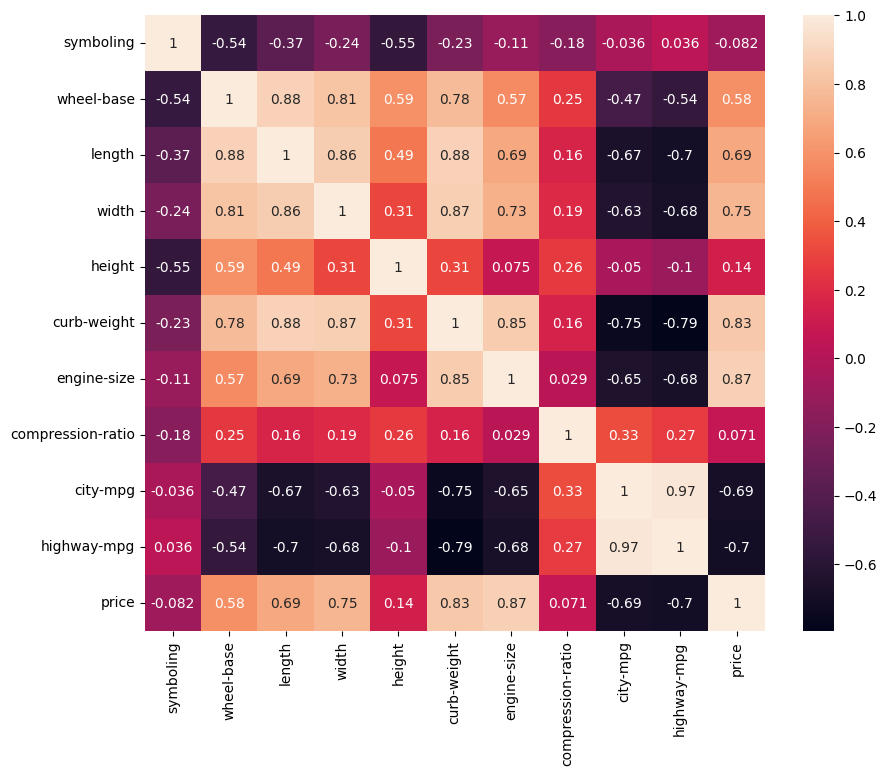

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
final_df = df[['engine-size','price']]
predictor = df['engine-size']
target = df['price']

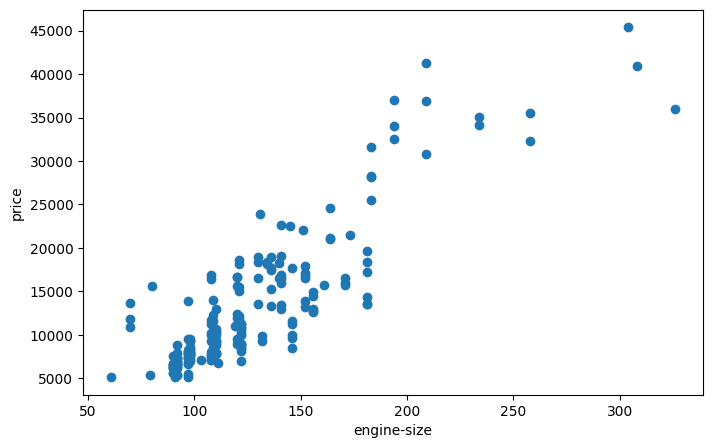

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(predictor,target)
plt.xlabel("engine-size")
plt.ylabel("price")
plt.show()

In [ ]:
b1 = slope(predictor,target)


In [ ]:
b0 = intercept(predictor,target,b1)


In [ ]:
prediction = linear(predictor,b0,b1)


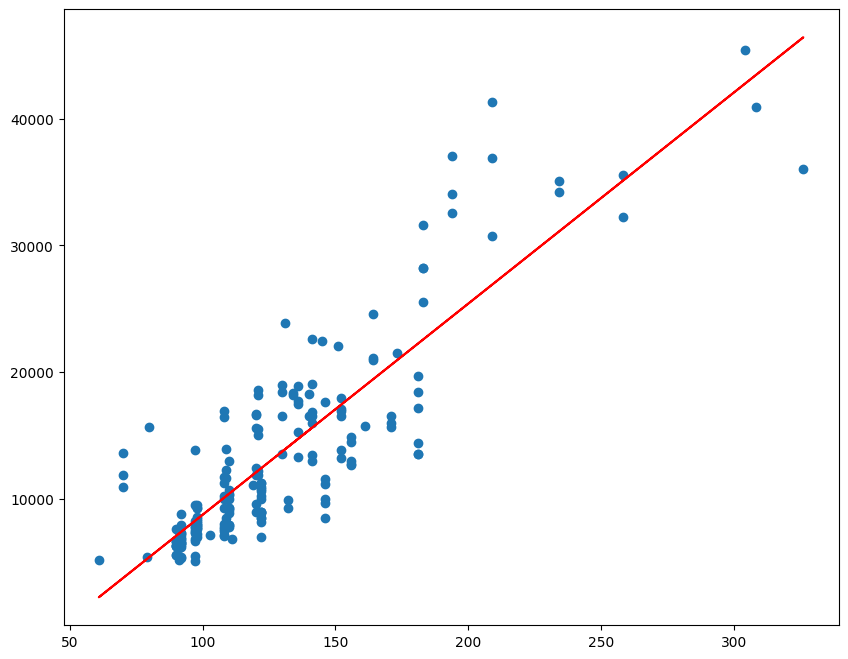

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(predictor,target)
plt.plot(predictor,prediction,color='r')
plt.show()

In [ ]:
print(b0)


-7963.338906281075


In [ ]:
b1


166.8600156914162

In [ ]:
#[0] * x creates a list with x elements
def r_squared(Y,Y_hat):
    sse , ste ,r_sqr = [0]*3
    
    
    sse = sum([(y-y_hat)**2 for y,y_hat in zip(Y,Y_hat)])
    y_= np.mean(Y)
    ste = sum([(y-y_)**2 for y in zip(Y)])
    
    r_sqr = 1-(sse/ste)
    return r_sqr
    

In [ ]:
r_squared(target,prediction)


array([0.76096864])

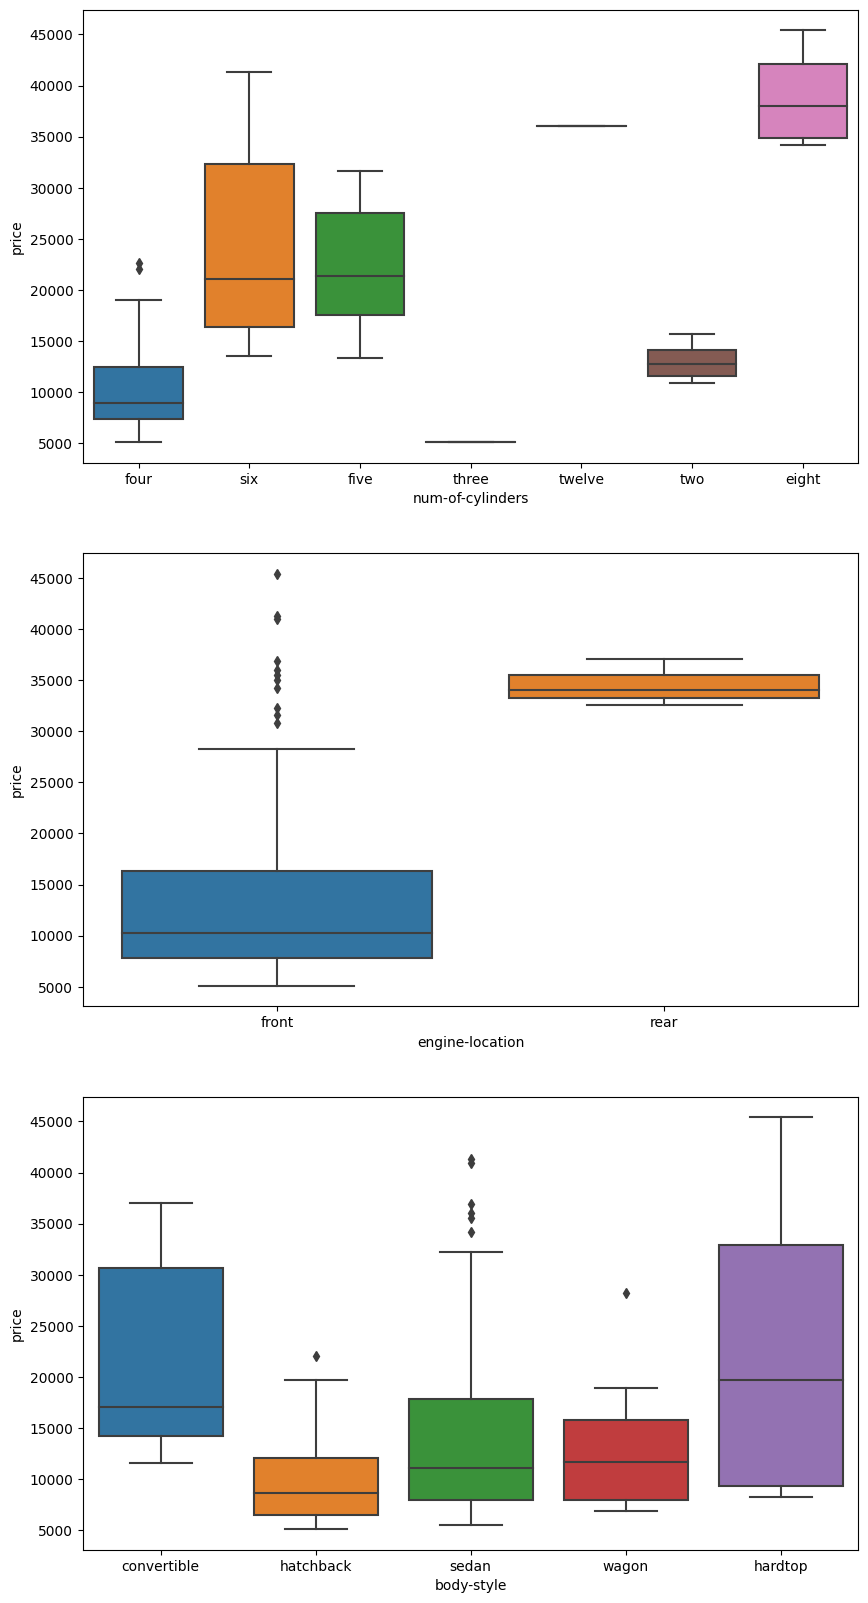

In [ ]:
fig, [ax1, ax2,ax3] = plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x="num-of-cylinders", y="price", data=df,ax=ax1)
sns.boxplot(x="engine-location", y="price", data=df,ax=ax2)
sns.boxplot(x="body-style", y="price", data=df,ax=ax3);

<ipython-input-30-f9e04c483058>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


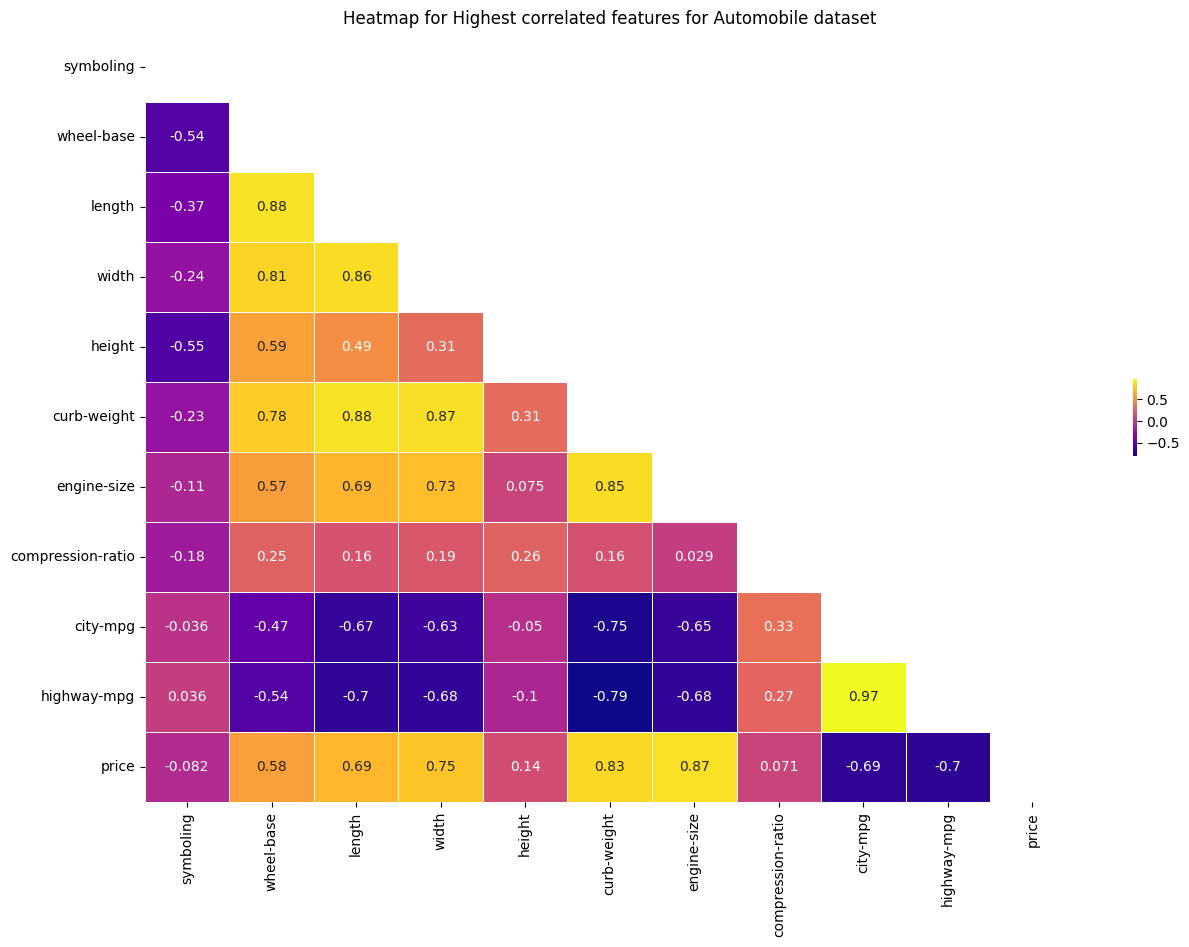

In [ ]:
corr=df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, cmap='plasma', annot=True, ax=ax,
mask=mask, cbar_kws={'shrink': 0.10},linewidths=.5)
plt.title("Heatmap for Highest correlated features for Automobile dataset");

TypeError: ignored

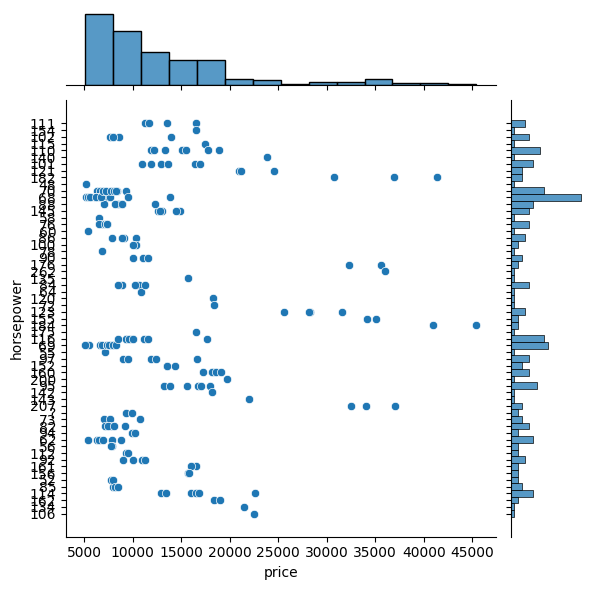

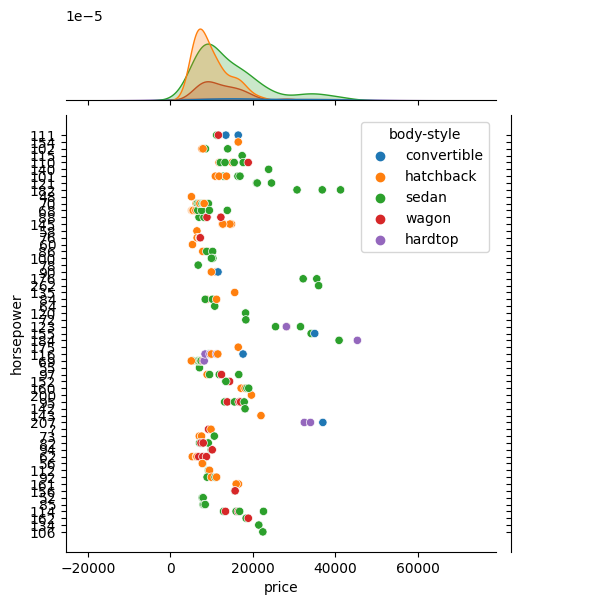

In [ ]:
sns.jointplot(x='price', y='horsepower',data=df)
sns.jointplot(x='price', y='horsepower',
data=df, hue='body-style');

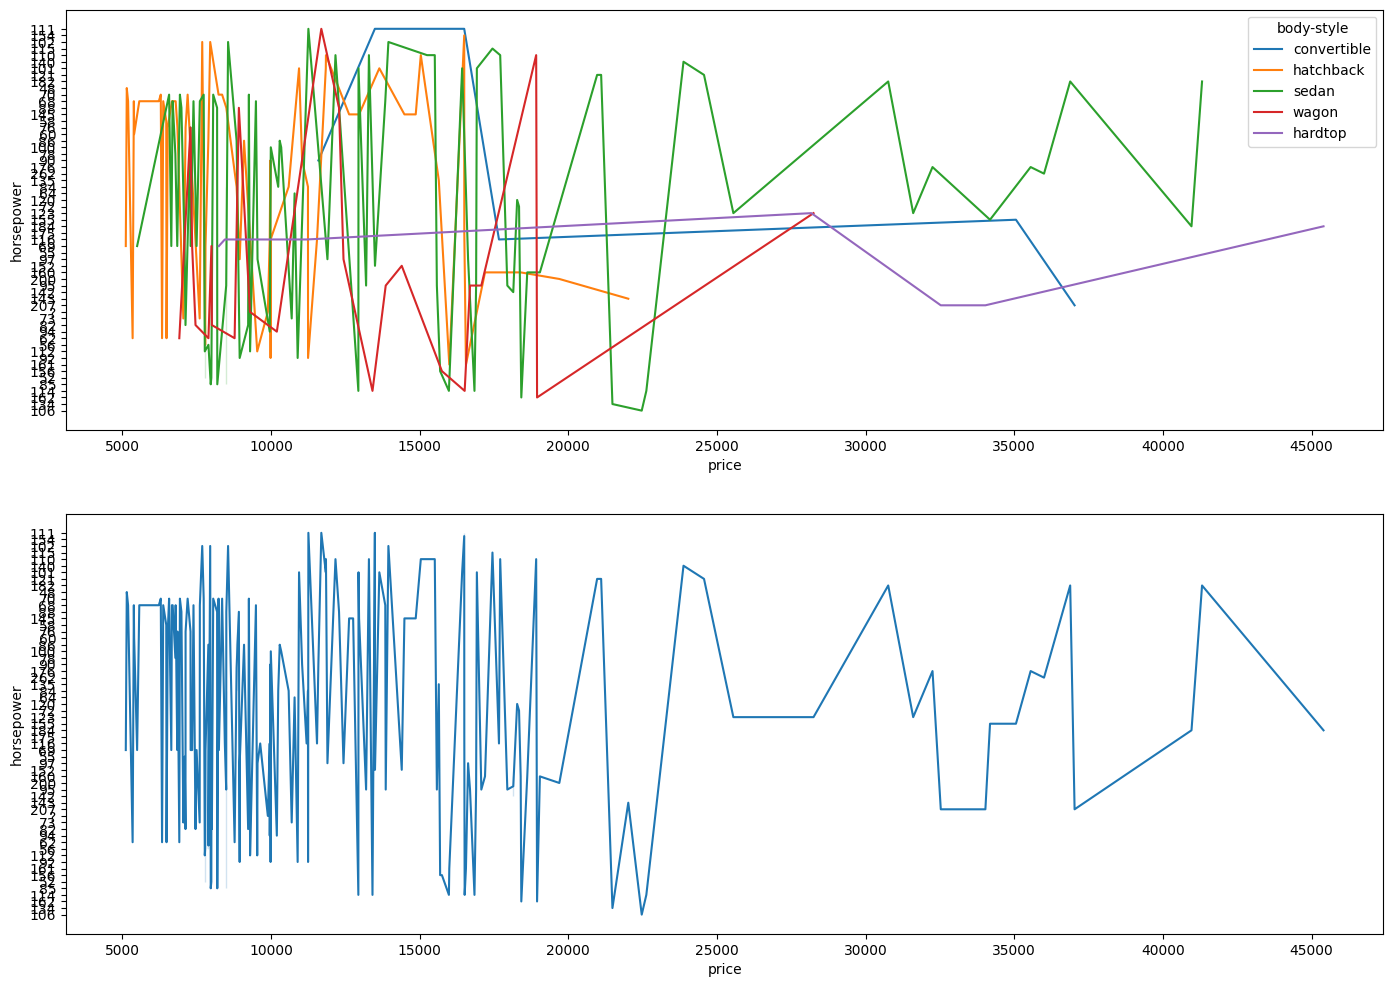

In [ ]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(17,12))
sns.lineplot(x='price',y='horsepower',hue='body-style',data=df,ax=ax1)
sns.lineplot(x='price',y='horsepower',data=df,ax=ax2);